In [2]:
from __future__ import division, print_function, unicode_literals
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d 
from sklearn import datasets
from sklearn.neighbors.kde import KernelDensity

Text(-10,0.5,'$\\sigma(z)=1/(1+\\exp(-z))$')

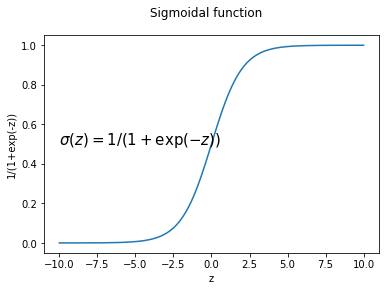

In [3]:
xv=np.linspace(-10,10,100)
yv=1/(1+np.exp(-xv))
fig = plt.figure()
fig.suptitle('Sigmoidal function')
ax = fig.add_subplot(111)
ax.plot(xv,yv)
ax.set_xlabel('z')
ax.set_ylabel('1/(1+exp(-z))')
ax.text(-10.,0.5, r'$\sigma(z)=1/(1+\exp(-z))$', fontsize=15)  #轴上标注，Latex?

In [5]:
df = pd.read_csv('Default.csv')
df.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [6]:
# A bit of practice with pandas commands
print("Using pandas\n")
print("type of df is ",type(df))
print("the keys of the data dictionary:\n", df.keys())
print("first 5 entries:\n",df.head(5))
print("3rd row 5th col df[2,4]: ", df.values[2,4], " is the same as ",\
      "\n the 3rd row of the 'income' column, df['income'][2]:", df['income'][2]) # values() returns a numpy array 

Using pandas

type of df is  <class 'pandas.core.frame.DataFrame'>
the keys of the data dictionary:
 Index(['Unnamed: 0', 'default', 'student', 'balance', 'income'], dtype='object')
first 5 entries:
    Unnamed: 0 default student      balance        income
0           1      No      No   729.526495  44361.625074
1           2      No     Yes   817.180407  12106.134700
2           3      No      No  1073.549164  31767.138947
3           4      No      No   529.250605  35704.493935
4           5      No      No   785.655883  38463.495879
3rd row 5th col df[2,4]:  31767.1389473999  is the same as  
 the 3rd row of the 'income' column, df['income'][2]: 31767.1389473999


In [7]:
# Convert Yes/No to 1/0; easier to plot -- using more pandas functions
df.replace({'No': 0}, inplace=True)
df.replace({'Yes': 1}, inplace=True)
df.head() ##

,Unnamed: 0,default,student,balance,income
0,1,0,0,729.526495,44361.625074
1,2,0,1,817.180407,12106.134700
2,3,0,0,1073.549164,31767.138947
3,4,0,0,529.250605,35704.493935
4,5,0,0,785.655883,38463.495879


Red points are for defaulters, green for non-defaulters.


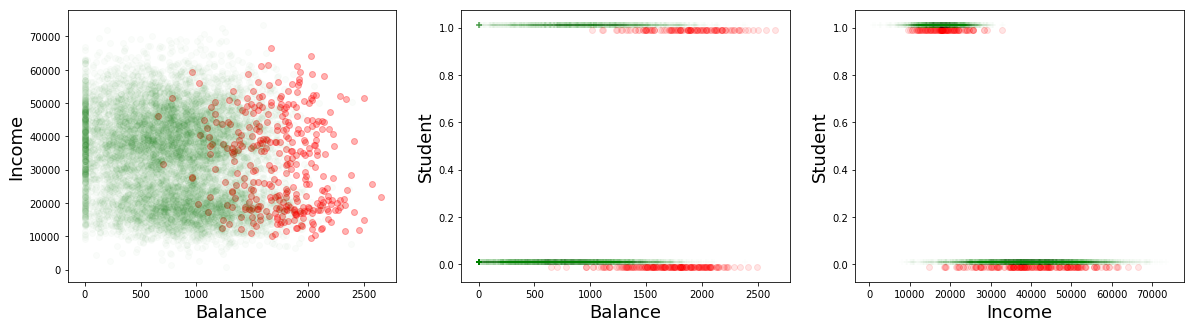

In [32]:
# A quick look at scatter plots to determine features that might
# distinguish defaulters (1, red) from non-defaulters (0, green) 
# 

fig, ax = plt.subplots(figsize=(20,5),nrows=1, ncols=3)
ax[0].scatter(df[df['default']==1]['balance'], \
            df[df['default']==1]['income'], c='r', alpha=0.3)
ax[0].scatter(df[df['default']==0]['balance'], \
            df[df['default']==0]['income'], c='g', alpha=0.02)
ax[0].set_xlabel('Balance', fontsize=18)
ax[0].set_ylabel('Income', fontsize=18)
ax[1].scatter(df[df['default']==1]['balance'],\
              df[df['default']==1]['student']-0.01, c='r', marker = 'o', alpha=0.1)  #取出default=1的数据帧，不是student=1的数据帧,每条数据帧里含有student=1和student=0两类数据
ax[1].scatter(df[df['default']==0]['balance'],\                                     #加减0.01没有特别意义，只是为了让图像最后红绿区分出来，否则在一条线上
              df[df['default']==0]['student']+0.01, c='g',marker = '+', alpha=0.01) 
ax[1].set_xlabel('Balance', fontsize=18)
ax[1].set_ylabel('Student', fontsize=18)
ax[2].scatter(df[df['default']==1]['income'],\
              df[df['default']==1]['student']-0.01, c='r', marker = 'o', alpha=0.1)
ax[2].scatter(df[df['default']==0]['income'],\
              df[df['default']==0]['student']+0.01, c='g',marker = '+', alpha=0.01)
ax[2].set_xlabel('Income', fontsize=18)
ax[2].set_ylabel('Student', fontsize=18)
print("Red points are for defaulters, green for non-defaulters.")

In [15]:
# To minimise typing out different slices of the DataFrame, define:
defaulters = df[df['default']==1]
nondefaulters  = df[df['default']==0]

Histograms of defaulters (red) and non-defaulters (green).
      (Aside:) income distributions are bimodal.


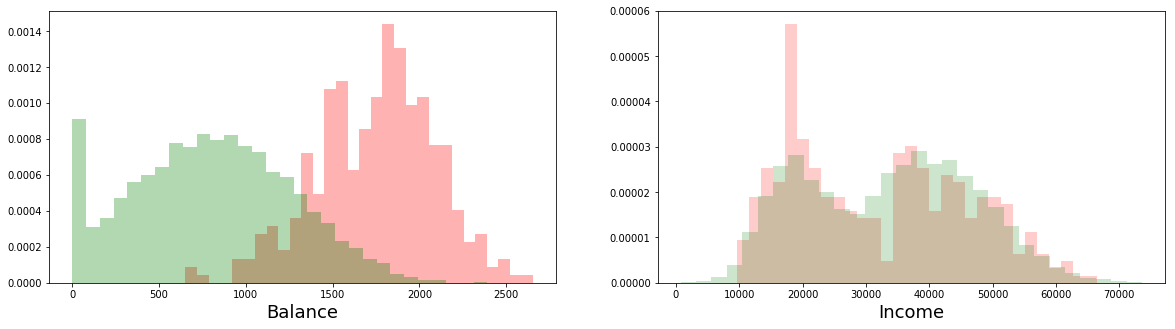

In [16]:
fig, ax = plt.subplots(figsize=(20,5),nrows=1, ncols=2)
ax[0].hist(defaulters.balance, \
           bins=30, density=True, color='r', alpha=0.3) #bins为直方图每条宽度
ax[0].hist(nondefaulters.balance, \
           bins=30, density=True, color='g', alpha=0.3)
ax[0].set_xlabel('Balance', fontsize=18)
ax[1].hist(defaulters.income, 
           bins=30, density=True, color='r', alpha=0.2)
ax[1].hist(nondefaulters.income, \
           bins=30, density=True, color='g', alpha=0.2)
ax[1].set_xlabel('Income', fontsize=18)
print("Histograms of defaulters (red) and non-defaulters (green).\n\
      (Aside:) income distributions are bimodal.")

In [33]:
binedge=np.linspace(0,2700-5,50) # we will place the data in 50 bins #最后一个参数是sample sizes
mid=np.mean((binedge[1:]-binedge[:-1])/2) # identify bins by their mid-points #相邻两个元素的差值构成的数组的均值
print(binedge[1:]) #从第二个元素开始
print(binedge[:-1]) #从第一个元素到最后
print(mid)  ######
binmid=binedge[:-1]+mid #每个元素加上这个均值
# print(binmid)
# create histograms for defaulters and non-defaulters
# these correspond to P(balance|default == 1) and P(balance| default == 0)
defhist=np.histogram(defaulters['balance'], bins=binedge, density="True")
nondefhist=np.histogram(nondefaulters['balance'], bins=binedge, density="True")

[  55.  110.  165.  220.  275.  330.  385.  440.  495.  550.  605.  660.
  715.  770.  825.  880.  935.  990. 1045. 1100. 1155. 1210. 1265. 1320.
 1375. 1430. 1485. 1540. 1595. 1650. 1705. 1760. 1815. 1870. 1925. 1980.
 2035. 2090. 2145. 2200. 2255. 2310. 2365. 2420. 2475. 2530. 2585. 2640.
 2695.]
[   0.   55.  110.  165.  220.  275.  330.  385.  440.  495.  550.  605.
  660.  715.  770.  825.  880.  935.  990. 1045. 1100. 1155. 1210. 1265.
 1320. 1375. 1430. 1485. 1540. 1595. 1650. 1705. 1760. 1815. 1870. 1925.
 1980. 2035. 2090. 2145. 2200. 2255. 2310. 2365. 2420. 2475. 2530. 2585.
 2640.]
27.5
[  27.5   82.5  137.5  192.5  247.5  302.5  357.5  412.5  467.5  522.5
  577.5  632.5  687.5  742.5  797.5  852.5  907.5  962.5 1017.5 1072.5
 1127.5 1182.5 1237.5 1292.5 1347.5 1402.5 1457.5 1512.5 1567.5 1622.5
 1677.5 1732.5 1787.5 1842.5 1897.5 1952.5 2007.5 2062.5 2117.5 2172.5
 2227.5 2282.5 2337.5 2392.5 2447.5 2502.5 2557.5 2612.5 2667.5]


[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.46000546e-05
 5.46000546e-05 0.00000000e+00 5.46000546e-05 0.00000000e+00
 0.00000000e+00 1.63800164e-04 1.63800164e-04 1.09200109e-04
 3.82200382e-04 2.18400218e-04 2.73000273e-04 4.36800437e-04
 7.09800710e-04 5.46000546e-04 5.46000546e-04 1.20120120e-03
 1.14660115e-03 6.55200655e-04 7.64400764e-04 1.36500137e-03
 1.25580126e-03 1.03740104e-03 1.31040131e-03 9.82800983e-04
 9.82800983e-04 1.09200109e-03 6.55200655e-04 6.00600601e-04
 4.36800437e-04 2.73000273e-04 2.73000273e-04 1.63800164e-04
 5.46000546e-05 1.09200109e-04 5.46000546e-05 0.00000000e+00
 5.46000546e-05]


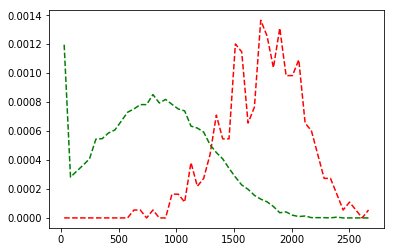

In [28]:
# we display the (x,y) values of (balance, prob())
x_grid = binmid
defhist1=defhist[0] # just keep the values in each bin
#default为1的数据帧的balance列的概率
print(defhist1)
nondefhist1=nondefhist[0] # just keep the values in each bin
#default为0的数据帧的balance列的概率
plt.plot(x_grid,defhist1, 'r--')
plt.plot(x_grid,nondefhist1, 'g--')

[55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55.
 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55.
 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55. 55.]
Cumulative probability  [1.0000000000000002, 1.0000000000000002]


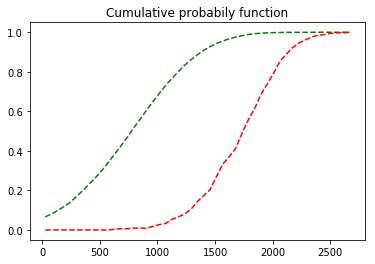

In [22]:
binsizes = []
for i in range(len(binedge)-1):
    binsizes.append( binedge[i+1]-binedge[i])#把binedge的每一项的差值放在一个列表中
print(np.asarray(binsizes))
cumulative_p0 = []
cumulative_p1 = []
c0 = 0.
c1 = 0.
for i in range(len(binedge)-1):
    c0 += nondefhist1[i]*binsizes[i]
    c1 += defhist1[i]*binsizes[i]
    cumulative_p0.append(c0)
    cumulative_p1.append(c1)
cdf_x0 = np.asarray(cumulative_p0)
cdf_x1 = np.asarray(cumulative_p1)
plt.plot(x_grid, cdf_x0,'g--')
plt.plot(x_grid, cdf_x1, 'r--')
plt.title("Cumulative probabily function")
print("Cumulative probability ",[cumulative_p0[-1], cumulative_p1[-1]])  #-1表示最后一个元素

136     1486.998122
173     2205.799521
201     1774.694223
206     1889.599190
209     1899.390626
241     1572.856481
243     1964.476872
263     1530.353157
341     1642.819997
345     1991.649120
349     1550.449264
357     1328.892725
406     1700.599913
439     1118.701039
440     1119.097245
487     1981.451815
540     1717.071593
545     1465.210164
576     1763.579088
581     1770.969441
641     1531.716459
651      780.172569
713     1551.023469
740     1504.290178
761     1871.938387
803     1902.612991
833     1881.049952
867     1505.831475
920     1889.332110
932     1243.554025
           ...     
9256    1800.641733
9271    1547.995445
9295    2095.114817
9328    1538.015603
9369    1815.174112
9432    2073.782846
9437     961.732662
9448    1825.970599
9458    1658.967689
9477    1506.191848
9485    1719.255655
9500    2046.639515
9510    1726.479610
9515    1666.113834
9522     959.159213
9538     652.397134
9610    1502.186739
9654    2128.795992
9783    1530.551479


D:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


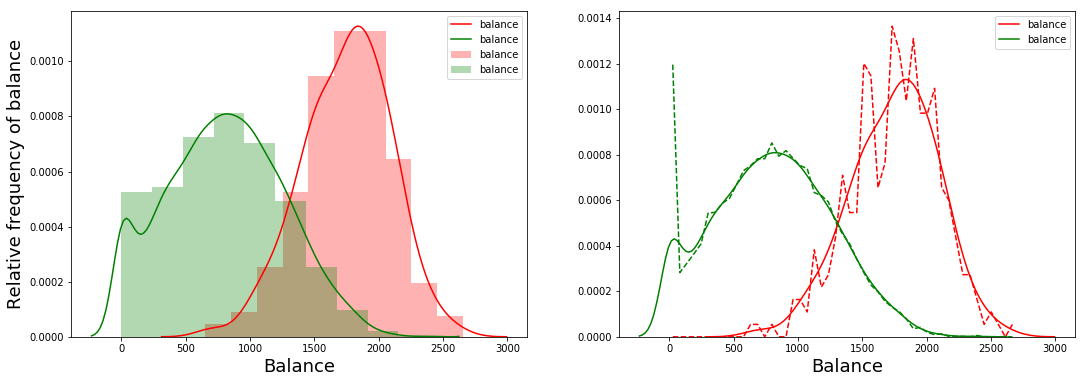

In [27]:
fig, axes = plt.subplots(figsize=(18,6),nrows=1, ncols=2)
axes[0].hist(defaulters.balance,color='r',alpha=0.3,density=True)
axes[0].hist(nondefaulters.balance,color='g',alpha=0.3,density=True)
axes[0].set_xlabel('Balance',fontsize=18)
axes[0].set_ylabel('Relative frequency of balance',fontsize=18)

# how would you convert a histogram into a pdf?
sns.kdeplot(defaulters.balance, color ='r', ax=axes[0]) # kernel density estimator (kde)
sns.kdeplot(nondefaulters.balance, color ='g', ax=axes[0]) # kde smooths histograms into pdfs


# rename the histograms to values p_x_condition = p(x|condition)
# also recall that we've renamed the values of 'balance' 
# for mid-pts of the bins x-grid


p_x_default = defhist1 
p_x_nondefault = nondefhist1 
axes[1].plot(x_grid, p_x_default, 'r--')
axes[1].plot(x_grid, p_x_nondefault, 'g--')
axes[1].set_xlabel('Balance', fontsize=18)

# print(defaulters.balance)
# print("--------------------")
# print(defaulters.balance[1:])  #balance是2*n列数组，这句取出下标从1开始到最后
sns.kdeplot(defaulters.balance[1:], color ='r', ax=axes[1]) # kernel density estimator (kde)
sns.kdeplot(nondefaulters.balance[1:], color ='g', ax=axes[1]) # kde smooths histograms into pdfs

In [29]:
def logodds(a, b, eps=1e-14): 
    # take log ( ratio of probabilities of (y vs not-y) )   
    a=a+eps # to prevent taking logs of 0 or infinity
    b=b+eps # to prevent taking logs of 0 or infinity
    return np.log(a/b)

def sigmoid(x):
    return 1/(1+np.exp(-x))

Linear regression fit for log-odds on the left; sigmoidal transformation of linear fit on the right


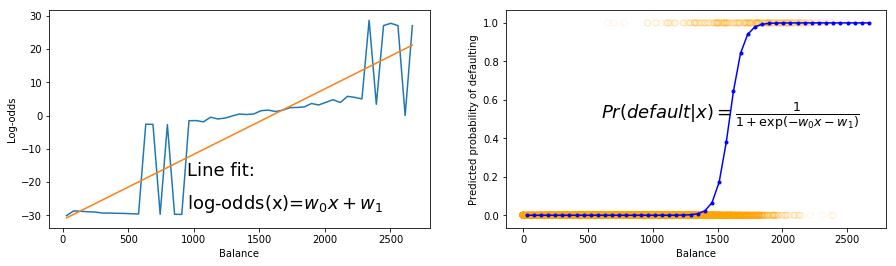

In [30]:
fig, axes = plt.subplots(figsize=(15,4),nrows=1, ncols=2)
lodds=logodds(p_x_default,p_x_nondefault, 1e-16)  ###两个机率相除取对数后转化为线性回归
lrfit=np.polyfit(x_grid, lodds, deg=1) ##线性回归直线拟合straight line fit
axes[0].plot(x_grid, lodds)
# plot log-odds "lodds" and also the straight line fit to it
# (lrfit[1], lrfit[0]) = (intercept, slope) 
axes[0].plot(x_grid,(lrfit[0]*x_grid + lrfit[1])) # lrfit[0] is the slope 
axes[0].set_xlabel('Balance')
axes[0].set_ylabel('Log-odds')
axes[0].text(950,-18, r'Line fit:', fontsize=18)
axes[0].text(950,-28, r'log-odds(x)=$w_0x+w_1$', fontsize=18)
axes[1].scatter(df.balance, df.default, facecolors='none',edgecolors='orange',alpha=0.1,marker='o')
axes[1].plot(x_grid,sigmoid(lrfit[0]*x_grid+lrfit[1]),'b.-')##直线拟合两个概率相除的对数后再取sigmoid函数，让离散二元概率转化为连续函数
axes[1].set_xlabel('Balance')
axes[1].set_ylabel('Predicted probability of defaulting')
axes[1].text(600,0.5, r'$Pr({default}|x)=\frac{1}{1+\exp(-w_0x-w_1)}$', fontsize=18)
print("Linear regression fit for log-odds on the left; sigmoidal transformation of linear fit on the right")